# Models, Convolutional Neural Networks

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from torchvision import datasets, models, transforms
import torch.optim as optim
import torch.nn as nn
from torchvision.transforms import *
from torch.utils.data import DataLoader
import torch
import numpy as np
from collections import namedtuple
import pandas as pd

def create_model(model_type, num_classes, pretrained=True):
    device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
    if 'resnet18' == model_type:
        model = models.resnet18(pretrained=pretrained)
        model.fc = nn.Linear(model.fc.in_features, num_classes)
    elif 'resnet34' == model_type:
        model = models.resnet34(pretrained=pretrained)
        model.fc = nn.Linear(model.fc.in_features, num_classes)
    elif 'resnet50' == model_type:
        model = models.resnet50(pretrained=pretrained)
        model.fc = nn.Linear(model.fc.in_features, num_classes)
    elif 'resnet101' == model_type:
        model = models.resnet101(pretrained=pretrained)
        model.fc = nn.Linear(model.fc.in_features, num_classes)
    elif 'resnet152' == model_type:
        model = models.resnet152(pretrained=pretrained)
        model.fc = nn.Linear(model.fc.in_features, num_classes)
    elif 'alexnet' == model_type:
        model = models.alexnet(pretrained=pretrained)
        model.classifier[6] = nn.Linear(4096, num_classes)
    elif 'vgg11' == model_type:
        model = models.vgg11(pretrained=pretrained)
        model.classifier[6] = nn.Linear(model.classifier[6].in_features, num_classes)
    elif 'vgg11_bn' == model_type:
        model = models.vgg11_bn(pretrained=pretrained)
        model.classifier[6] = nn.Linear(model.classifier[6].in_features, num_classes)
    elif 'vgg13' == model_type:
        model = models.vgg13(pretrained=pretrained)
        model.classifier[6] = nn.Linear(model.classifier[6].in_features, num_classes)
    elif 'vgg13_bn' == model_type:
        model = models.vgg13_bn(pretrained=pretrained)
        model.classifier[6] = nn.Linear(model.classifier[6].in_features, num_classes)
    elif 'vgg16' == model_type:
        model = models.vgg16(pretrained=pretrained)
        model.classifier[6] = nn.Linear(model.classifier[6].in_features, num_classes)
    elif 'vgg16_bn' == model_type:
        model = models.vgg16_bn(pretrained=pretrained)
        model.classifier[6] = nn.Linear(model.classifier[6].in_features, num_classes)
    elif 'vgg19' == model_type:
        model = models.vgg19(pretrained=pretrained)
        model.classifier[6] = nn.Linear(model.classifier[6].in_features, num_classes)
    elif 'vgg19_bn' == model_type:
        model = models.vgg19_bn(pretrained=pretrained)
        model.classifier[6] = nn.Linear(model.classifier[6].in_features, num_classes)
    elif 'squeezenet1_0' == model_type:
        model = models.squeezenet1_0(pretrained=pretrained)
        model.classifier[1] = nn.Conv2d(512, num_classes, kernel_size=(1,1), stride=(1,1))
        model.num_classes = num_classes
    elif 'squeezenet1_1' == model_type:
        model = models.squeezenet1_1(pretrained=pretrained)
        model.classifier[1] = nn.Conv2d(512, num_classes, kernel_size=(1,1), stride=(1,1))
        model.num_classes = num_classes
    elif 'densenet121' == model_type:
        model = models.densenet121(pretrained=pretrained)
        model.classifier = nn.Linear(model.classifier.in_features, num_classes)
    elif 'densenet161' == model_type:
        model = models.densenet161(pretrained=pretrained)
        model.classifier = nn.Linear(model.classifier.in_features, num_classes)
    elif 'densenet169' == model_type:
        model = models.densenet169(pretrained=pretrained)
        model.classifier = nn.Linear(model.classifier.in_features, num_classes)
    elif 'densenet201' == model_type:
        model = models.densenet201(pretrained=pretrained)
        model.classifier = nn.Linear(model.classifier.in_features, num_classes)
    elif 'googlenet' == model_type:
        model = models.googlenet(pretrained=pretrained)
        model.fc = nn.Linear(model.fc.in_features, num_classes)
    elif 'shufflenet_v2_x0_5' == model_type:
        model = models.shufflenet_v2_x0_5(pretrained=pretrained)
        model.fc = nn.Linear(model.fc.in_features, num_classes)
    elif 'shufflenet_v2_x1_0' == model_type:
        model = models.shufflenet_v2_x1_0(pretrained=pretrained)
        model.fc = nn.Linear(model.fc.in_features, num_classes)
    elif 'mobilenet_v2' == model_type:
        model = models.mobilenet_v2(pretrained=pretrained)
        model.classifier[1] = nn.Linear(model.classifier[1].in_features, num_classes)
    elif 'resnext50_32x4d' == model_type:
        model = models.resnext50_32x4d(pretrained=pretrained)
        model.classifier[1] = nn.Linear(model.classifier[1].in_features, num_classes)
    elif 'resnext101_32x8d' == model_type:
        model = models.resnext101_32x8d(pretrained=pretrained)
        model.fc = nn.Linear(model.fc.in_features, num_classes)
    elif 'wide_resnet50_2' == model_type:
        model = models.wide_resnet50_2(pretrained=pretrained)
        model.fc = nn.Linear(model.fc.in_features, num_classes)
    elif 'wide_resnet101_2' == model_type:
        model = models.wide_resnet101_2(pretrained=pretrained)
        model.fc = nn.Linear(model.fc.in_features, num_classes)
    elif 'mnasnet0_5' == model_type:
        model = models.mnasnet0_5(pretrained=pretrained)
        model.classifier[1] = nn.Linear(model.classifier[1].in_features, num_classes)
    elif 'mnasnet1_0' == model_type:
        model = models.mnasnet1_0(pretrained=pretrained)
        model.classifier[1] = nn.Linear(model.classifier[1].in_features, num_classes)
    else:
        model = models.inception_v3(pretrained=pretrained)
        model.AuxLogits.fc = nn.Linear(model.AuxLogits.fc.in_features, num_classes)
        model.fc = nn.Linear(model.fc.in_features, num_classes)
    return model.to(device)

def train(dataloader, model, num_epochs=20):
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Rprop(model.parameters(), lr=0.01)
    scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=1)
    
    results = []
    for epoch in range(num_epochs):
        optimizer.step()
        scheduler.step()
        model.train()

        running_loss = 0.0
        running_corrects = 0

        n = 0
        for inputs, labels in dataloader:
            inputs = inputs.to(device)
            labels = labels.to(device)

            optimizer.zero_grad()

            with torch.set_grad_enabled(True):
                outputs = model(inputs)
                loss = criterion(outputs, labels)
                _, preds = torch.max(outputs, 1)

                loss.backward()
                optimizer.step()

            running_loss += loss.item() * inputs.size(0)
            running_corrects += torch.sum(preds == labels.data)
            n += len(labels)

        epoch_loss = running_loss / float(n)
        epoch_acc = running_corrects.double() / float(n)

        print(f'epoch {epoch}/{num_epochs} : {epoch_loss:.5f}, {epoch_acc:.5f}')
        results.append(EpochProgress(epoch, epoch_loss, epoch_acc.item()))
    return pd.DataFrame(results)

def plot_results(df, figsize=(10, 5)):
    fig, ax1 = plt.subplots(figsize=figsize)
    
    ax1.set_xlabel('epoch')
    ax1.set_ylabel('loss', color='tab:red')
    ax1.plot(df['epoch'], df['loss'], color='tab:red')
    
    ax2 = ax1.twinx()
    ax2.set_ylabel('accuracy', color='tab:blue')
    ax2.plot(df['epoch'], df['accuracy'], color='tab:blue')
    
    fig.tight_layout()
    
np.random.seed(37)
torch.manual_seed(37)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False

num_classes = 3
pretrained = True
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')

EpochProgress = namedtuple('EpochProgress', 'epoch, loss, accuracy')

transform = transforms.Compose([Resize(224), ToTensor()])
image_folder = datasets.ImageFolder('./shapes/train', transform=transform)
dataloader = DataLoader(image_folder, batch_size=4, shuffle=True, num_workers=4)

## ResNet18

epoch 0/20 : 1.18291, 0.66667
epoch 1/20 : 1.89373, 0.56667
epoch 2/20 : 0.41106, 0.80000
epoch 3/20 : 0.09141, 0.96667
epoch 4/20 : 0.09910, 0.96667
epoch 5/20 : 0.08258, 0.96667
epoch 6/20 : 0.06175, 0.96667
epoch 7/20 : 0.34240, 0.86667
epoch 8/20 : 0.03592, 1.00000
epoch 9/20 : 0.15507, 0.93333
epoch 10/20 : 0.40221, 0.96667
epoch 11/20 : 0.07072, 0.96667
epoch 12/20 : 0.44840, 0.93333
epoch 13/20 : 0.01021, 1.00000
epoch 14/20 : 0.00262, 1.00000
epoch 15/20 : 0.00727, 1.00000
epoch 16/20 : 0.00639, 1.00000
epoch 17/20 : 0.05421, 0.96667
epoch 18/20 : 0.03431, 1.00000
epoch 19/20 : 0.00771, 1.00000


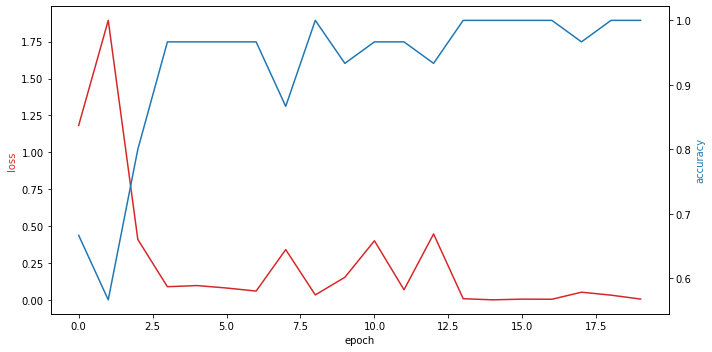

In [2]:
model = create_model('resnet18', num_classes)
plot_results(train(dataloader, model))

## ResNet152

epoch 0/20 : 1.05758, 0.46667
epoch 1/20 : 1.16346, 0.53333
epoch 2/20 : 0.64549, 0.76667
epoch 3/20 : 0.95055, 0.80000
epoch 4/20 : 0.90756, 0.80000
epoch 5/20 : 0.34013, 0.90000
epoch 6/20 : 0.24108, 0.90000
epoch 7/20 : 0.27768, 0.90000
epoch 8/20 : 0.33590, 0.83333
epoch 9/20 : 0.17696, 0.93333
epoch 10/20 : 0.19645, 0.93333
epoch 11/20 : 0.16078, 0.96667
epoch 12/20 : 0.29092, 0.90000
epoch 13/20 : 0.12218, 0.96667
epoch 14/20 : 0.36629, 0.90000
epoch 15/20 : 0.05436, 1.00000
epoch 16/20 : 0.12150, 0.96667
epoch 17/20 : 0.31146, 0.86667
epoch 18/20 : 0.13345, 0.93333
epoch 19/20 : 0.09892, 0.96667


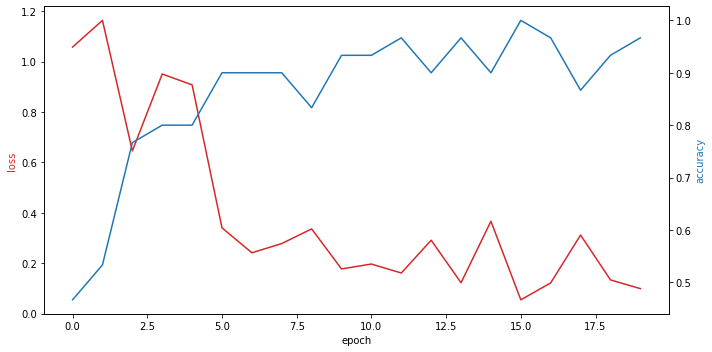

In [3]:
model = create_model('resnet152', num_classes)
plot_results(train(dataloader, model))

## AlexNet

epoch 0/20 : 1.81734, 0.50000
epoch 1/20 : 0.27831, 0.93333
epoch 2/20 : 0.00000, 1.00000
epoch 3/20 : 0.00000, 1.00000
epoch 4/20 : 0.00000, 1.00000
epoch 5/20 : 0.00000, 1.00000
epoch 6/20 : 0.00000, 1.00000
epoch 7/20 : 0.00000, 1.00000
epoch 8/20 : 16.65604, 0.83333
epoch 9/20 : 112.16134, 0.83333
epoch 10/20 : 0.00000, 1.00000
epoch 11/20 : 0.00000, 1.00000
epoch 12/20 : 0.00000, 1.00000
epoch 13/20 : 0.00000, 1.00000
epoch 14/20 : 0.00000, 1.00000
epoch 15/20 : 0.00000, 1.00000
epoch 16/20 : 0.00000, 1.00000
epoch 17/20 : 0.00000, 1.00000
epoch 18/20 : 0.00000, 1.00000
epoch 19/20 : 0.00000, 1.00000


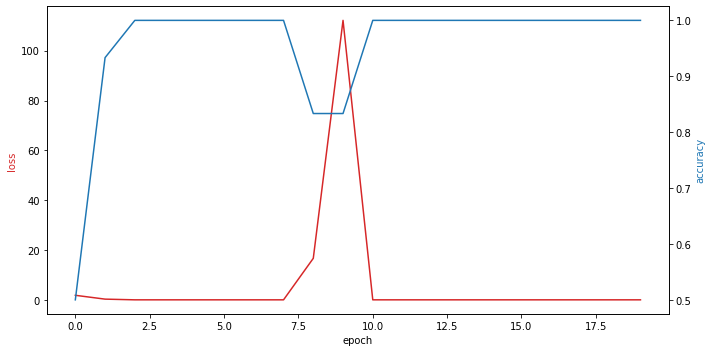

In [4]:
model = create_model('alexnet', num_classes)
plot_results(train(dataloader, model))

## VGG19_BN

epoch 0/20 : 1.57573, 0.30000
epoch 1/20 : 2.98208, 0.43333
epoch 2/20 : 2.65660, 0.43333
epoch 3/20 : 2.59287, 0.43333
epoch 4/20 : 1.47464, 0.63333
epoch 5/20 : 1.51472, 0.70000
epoch 6/20 : 2.31241, 0.63333
epoch 7/20 : 4.01626, 0.70000
epoch 8/20 : 1.80131, 0.70000
epoch 9/20 : 0.60555, 0.76667
epoch 10/20 : 4.39991, 0.70000
epoch 11/20 : 11.61466, 0.76667
epoch 12/20 : 14.72147, 0.70000
epoch 13/20 : 21.10119, 0.60000
epoch 14/20 : 8.72317, 0.80000
epoch 15/20 : 29.58264, 0.63333
epoch 16/20 : 55.09593, 0.56667
epoch 17/20 : 43.50651, 0.73333
epoch 18/20 : 24.32425, 0.80000
epoch 19/20 : 52.95311, 0.63333


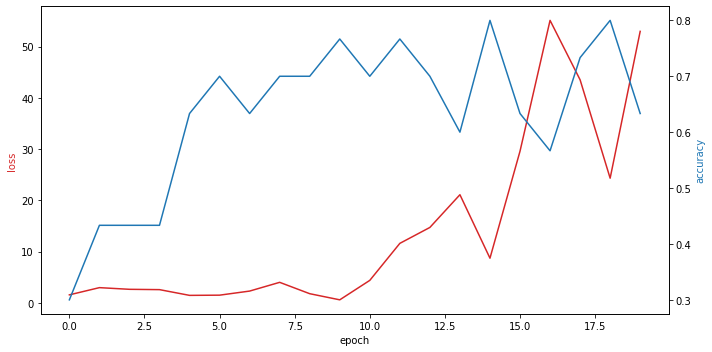

In [5]:
model = create_model('vgg19_bn', num_classes)
plot_results(train(dataloader, model))

## SqueezeNet1_1

epoch 0/20 : 1.21866, 0.33333
epoch 1/20 : 9.98165, 0.36667
epoch 2/20 : 0.72668, 0.56667
epoch 3/20 : 0.39277, 0.90000
epoch 4/20 : 0.23426, 0.86667
epoch 5/20 : 0.06756, 1.00000
epoch 6/20 : 0.00039, 1.00000
epoch 7/20 : 0.00001, 1.00000
epoch 8/20 : 0.00000, 1.00000
epoch 9/20 : 0.00000, 1.00000
epoch 10/20 : 0.00005, 1.00000
epoch 11/20 : 0.00001, 1.00000
epoch 12/20 : 0.00003, 1.00000
epoch 13/20 : 0.00002, 1.00000
epoch 14/20 : 0.00414, 1.00000
epoch 15/20 : 0.00007, 1.00000
epoch 16/20 : 0.00194, 1.00000
epoch 17/20 : 0.00001, 1.00000
epoch 18/20 : 0.00000, 1.00000
epoch 19/20 : 0.00002, 1.00000


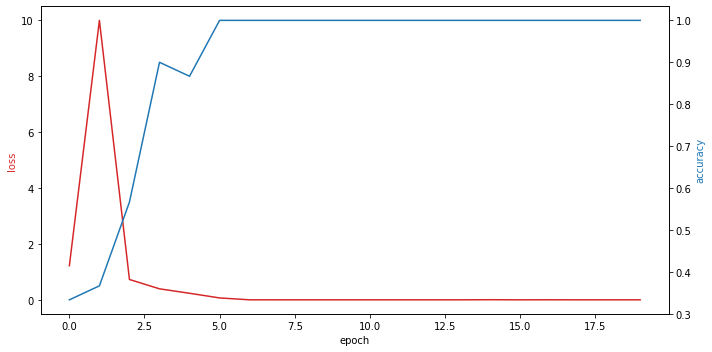

In [6]:
model = create_model('squeezenet1_1', num_classes)
plot_results(train(dataloader, model))

## DenseNet201

epoch 0/20 : 0.72701, 0.66667
epoch 1/20 : 1.02453, 0.70000
epoch 2/20 : 0.96627, 0.53333
epoch 3/20 : 0.31173, 0.86667
epoch 4/20 : 0.15640, 0.96667
epoch 5/20 : 0.16945, 0.93333
epoch 6/20 : 0.29515, 0.96667
epoch 7/20 : 0.01773, 1.00000
epoch 8/20 : 0.24685, 0.96667
epoch 9/20 : 0.04227, 1.00000
epoch 10/20 : 0.02191, 1.00000
epoch 11/20 : 0.04593, 0.96667
epoch 12/20 : 0.56858, 0.90000
epoch 13/20 : 0.23075, 0.96667
epoch 14/20 : 0.00034, 1.00000
epoch 15/20 : 0.41614, 0.96667
epoch 16/20 : 7.34440, 0.93333
epoch 17/20 : 0.00001, 1.00000
epoch 18/20 : 0.00000, 1.00000
epoch 19/20 : 0.00001, 1.00000


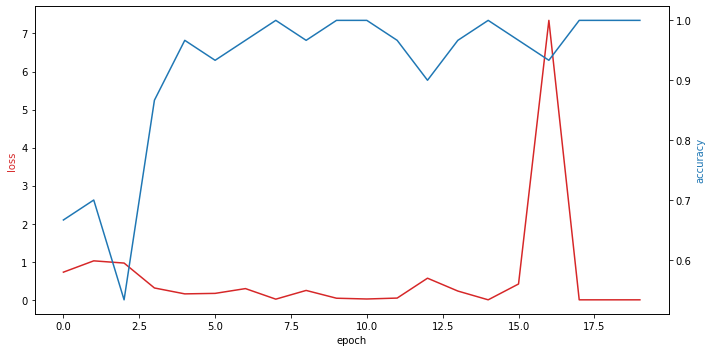

In [7]:
model = create_model('densenet201', num_classes)
plot_results(train(dataloader, model))

## GoogleNet

epoch 0/20 : 0.86476, 0.60000
epoch 1/20 : 0.23379, 0.96667
epoch 2/20 : 0.27786, 0.90000
epoch 3/20 : 0.26102, 0.90000
epoch 4/20 : 0.37974, 0.86667
epoch 5/20 : 0.62362, 0.83333
epoch 6/20 : 0.23246, 0.96667
epoch 7/20 : 0.03089, 1.00000
epoch 8/20 : 0.20011, 0.96667
epoch 9/20 : 0.50758, 0.93333
epoch 10/20 : 1.47066, 0.96667
epoch 11/20 : 1.83898, 0.86667
epoch 12/20 : 0.16165, 0.96667
epoch 13/20 : 0.08339, 0.96667
epoch 14/20 : 0.24430, 0.96667
epoch 15/20 : 0.00000, 1.00000
epoch 16/20 : 0.00000, 1.00000
epoch 17/20 : 18.42721, 0.90000
epoch 18/20 : 11.49901, 0.86667
epoch 19/20 : 0.00000, 1.00000


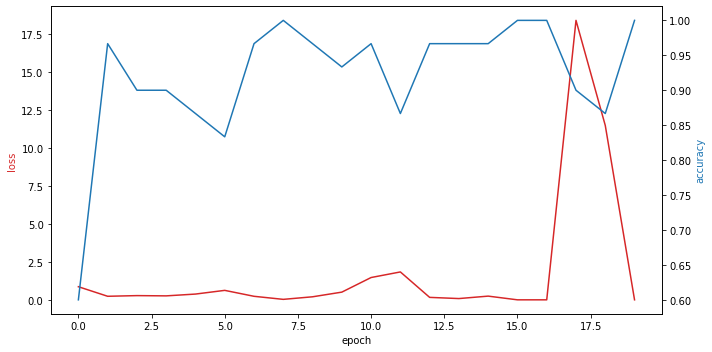

In [8]:
model = create_model('googlenet', num_classes)
plot_results(train(dataloader, model))

## ShuffleNet_v2_x1_0

epoch 0/20 : 1.07872, 0.56667
epoch 1/20 : 0.92128, 0.96667
epoch 2/20 : 0.85378, 0.80000
epoch 3/20 : 0.49947, 0.83333
epoch 4/20 : 0.35907, 0.86667
epoch 5/20 : 0.36595, 0.86667
epoch 6/20 : 0.39884, 0.93333
epoch 7/20 : 0.88971, 0.83333
epoch 8/20 : 1.29298, 0.93333
epoch 9/20 : 0.00000, 1.00000
epoch 10/20 : 0.00055, 1.00000
epoch 11/20 : 3.99944, 0.90000
epoch 12/20 : 11.36039, 0.80000
epoch 13/20 : 1.61926, 0.93333
epoch 14/20 : 0.00000, 1.00000
epoch 15/20 : 0.12407, 0.96667
epoch 16/20 : 1.21985, 0.96667
epoch 17/20 : 0.00000, 1.00000
epoch 18/20 : 5.15725, 0.90000
epoch 19/20 : 6.95566, 0.96667


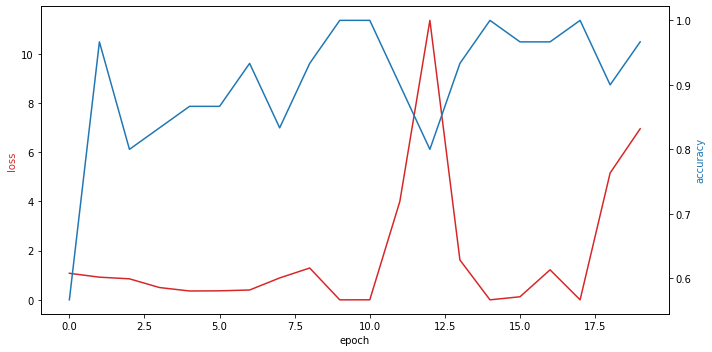

In [9]:
model = create_model('shufflenet_v2_x1_0', num_classes)
plot_results(train(dataloader, model))

## ResNext101_32x8d

epoch 0/20 : 1.43015, 0.46667
epoch 1/20 : 1.22794, 0.20000
epoch 2/20 : 0.67526, 0.73333
epoch 3/20 : 0.78122, 0.80000
epoch 4/20 : 0.92802, 0.73333
epoch 5/20 : 0.43424, 0.83333
epoch 6/20 : 0.77961, 0.76667
epoch 7/20 : 0.57481, 0.83333
epoch 8/20 : 0.43270, 0.83333
epoch 9/20 : 0.15556, 0.93333
epoch 10/20 : 0.60404, 0.73333
epoch 11/20 : 0.34068, 0.83333
epoch 12/20 : 0.41419, 0.86667
epoch 13/20 : 0.11453, 0.96667
epoch 14/20 : 0.31711, 0.90000
epoch 15/20 : 0.43241, 0.90000
epoch 16/20 : 0.52133, 0.83333
epoch 17/20 : 0.27476, 0.93333
epoch 18/20 : 0.33325, 0.86667
epoch 19/20 : 0.03640, 1.00000


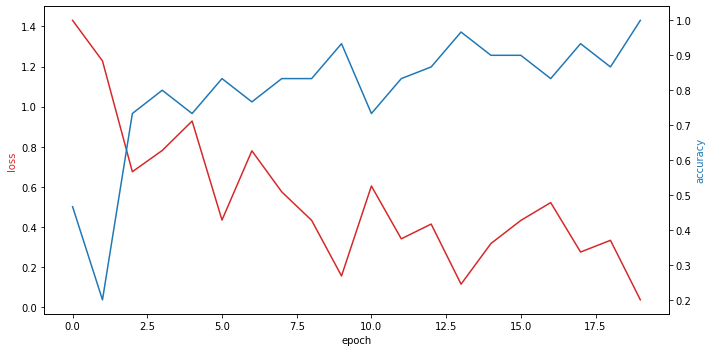

In [10]:
model = create_model('resnext101_32x8d', num_classes)
plot_results(train(dataloader, model))

## Wide_ResNet101_2

epoch 0/20 : 1.35520, 0.40000
epoch 1/20 : 1.10084, 0.53333
epoch 2/20 : 0.98938, 0.60000
epoch 3/20 : 0.77156, 0.66667
epoch 4/20 : 0.68366, 0.66667
epoch 5/20 : 1.39552, 0.80000
epoch 6/20 : 0.51887, 0.86667
epoch 7/20 : 1.09768, 0.76667
epoch 8/20 : 0.43709, 0.90000
epoch 9/20 : 1.33692, 0.76667
epoch 10/20 : 0.33994, 0.90000
epoch 11/20 : 0.68227, 0.70000
epoch 12/20 : 0.42560, 0.86667
epoch 13/20 : 0.31422, 0.90000
epoch 14/20 : 0.87191, 0.70000
epoch 15/20 : 0.28552, 0.90000
epoch 16/20 : 0.28395, 0.96667
epoch 17/20 : 0.30914, 0.93333
epoch 18/20 : 0.83613, 0.86667
epoch 19/20 : 0.43812, 0.83333


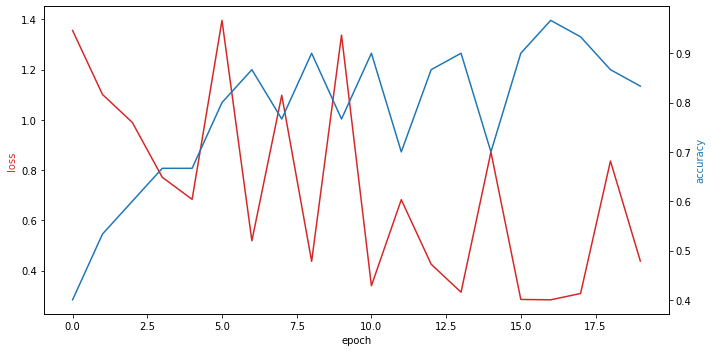

In [11]:
model = create_model('wide_resnet101_2', num_classes)
plot_results(train(dataloader, model))

## MNASNet1_0

epoch 0/20 : 0.95693, 0.56667
epoch 1/20 : 0.29174, 0.93333
epoch 2/20 : 0.28082, 0.90000
epoch 3/20 : 0.55879, 0.86667
epoch 4/20 : 0.17707, 0.96667
epoch 5/20 : 0.08460, 0.96667
epoch 6/20 : 0.26406, 0.90000
epoch 7/20 : 0.58479, 0.83333
epoch 8/20 : 1.02839, 0.70000
epoch 9/20 : 0.33897, 0.90000
epoch 10/20 : 0.36612, 0.86667
epoch 11/20 : 0.04169, 1.00000
epoch 12/20 : 0.11354, 0.96667
epoch 13/20 : 0.02400, 1.00000
epoch 14/20 : 0.67585, 0.86667
epoch 15/20 : 0.02202, 1.00000
epoch 16/20 : 1.15185, 0.90000
epoch 17/20 : 7.64333, 0.93333
epoch 18/20 : 1.09324, 0.93333
epoch 19/20 : 15.91377, 0.86667


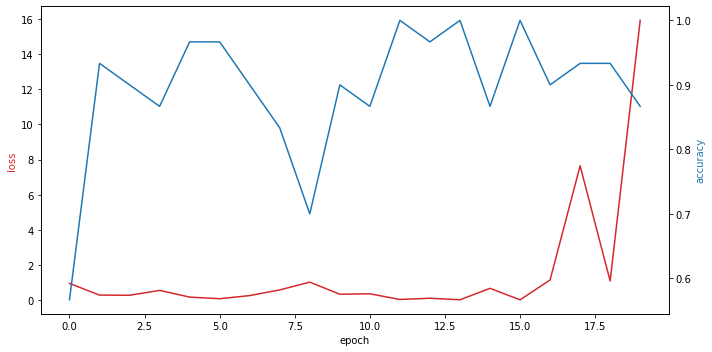

In [12]:
model = create_model('mnasnet1_0', num_classes)
plot_results(train(dataloader, model))